# SNAX package tutorial

In [1]:
from snewpy.neutrino import Flavor
import os
from tqdm.notebook import tqdm
import numpy as np
from multimessenger.supernova import Supernova_Models as sn
from multimessenger.supernova.Plotter import Plotter
import plotly.express as px
import astropy.units as u
import matplotlib.pyplot as plt

The `SNAX` is a wrapper around `snewpy` and it allows to compute CEvNS rates for all the snewpy models.

In [2]:
# sn.models_list

Each model contains variuous simulations with e.g. different EoS, or different progenitor properties. <br>
When only `model_name` is passed to `sn.Models()` it displays the existing files and asks you to select one. Otherwise, `filename` or `index` can be passed. <br>
Once the model is executed, and after every heavy computation the data is saved, and the next time it is directly fetched from the stored data. <br>
The output folder can be specified with the `storage` argument.

In [3]:
# A.delete_object()

In [4]:
A = sn.Models(model_name='Fornax_2021',index=5, storage="../../../scratch/SN_rewiev/", config_file="../simple_config.conf") #  
# A = sn.Models(model_name='Fornax_2021', index=5)

> You chose ~wisely~ ->	   [5]	lum_spec_17M_r10000_dat.h5
> Retrieving object self.storage/17.0 solMass.pickle


In [5]:
A.compute_rates();

Computing for all isotopes:   0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

One can also get a plotter, which takes the model object as input and allows for easy plotting. 

In [6]:
plotter = Plotter(A)

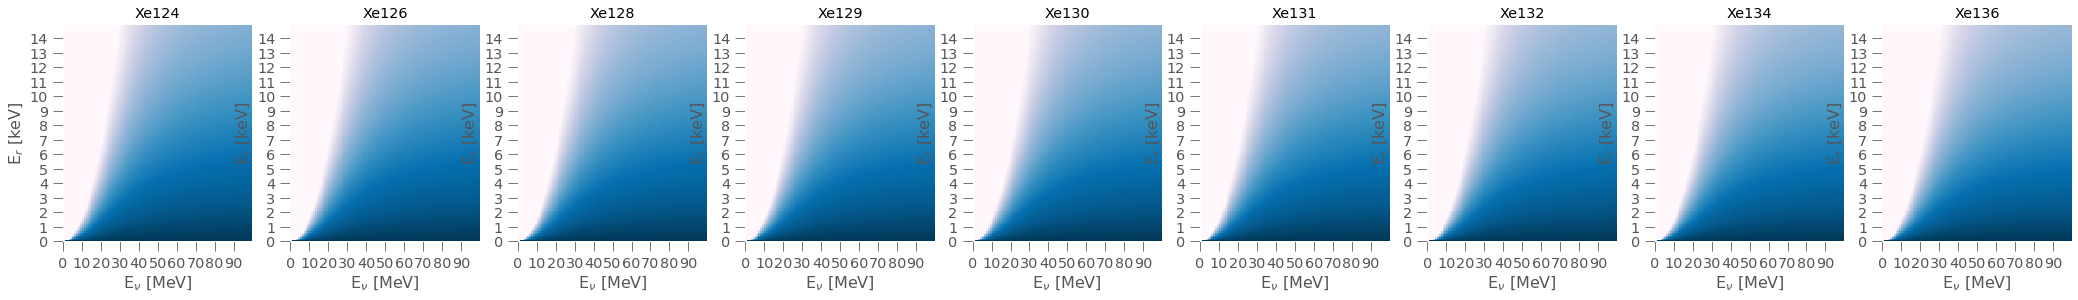

In [7]:
plotter.plot_cross_section_fantastic()

In [6]:
# plotter.plot_recoil_spectrum()

In [7]:
# plotter.plot_form_factor()

In [8]:
# plotter.plot_cross_section();

> You chose ~wisely~ ->	   [10]	nakazato-shen-z0.004-t_rev300ms-s50.0.fits
> KeyError: 'paths' 
Setting current directory as the storage, pass storage=<path-to-your-storage> 
> Retrieving object self.storage/nakazato-shen-z0.004-t_rev300ms-s50.0.fits.pickle


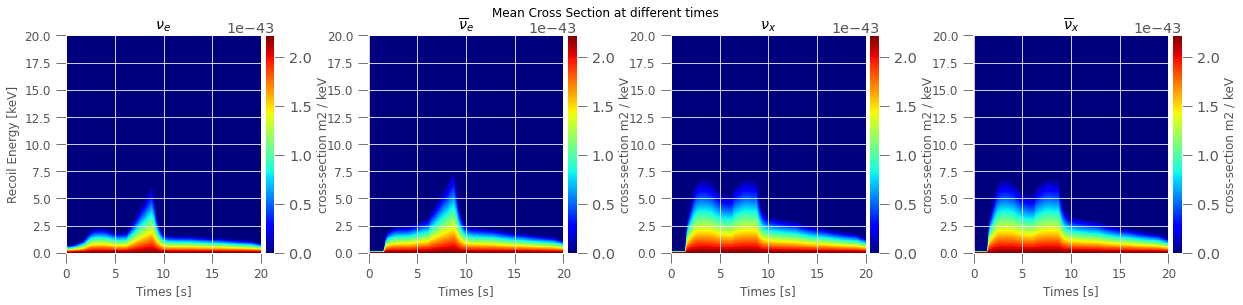

In [9]:
# not all models have same attributes
# plotter.plot_mean_cross_section(); # --> doesn't work as there are no meanE attribute in Fornax
B = sn.Models(model_name='Nakazato_2013', index=10)
plotter_B = Plotter(B)
plotter_B.plot_mean_cross_section();

In [10]:
# plotter_B.plot_params()

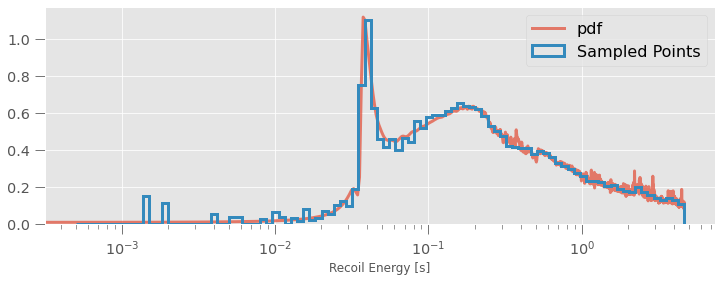

In [9]:
sampled_t = plotter.plot_sampled_data(50000, dtype="time", xscale="log");

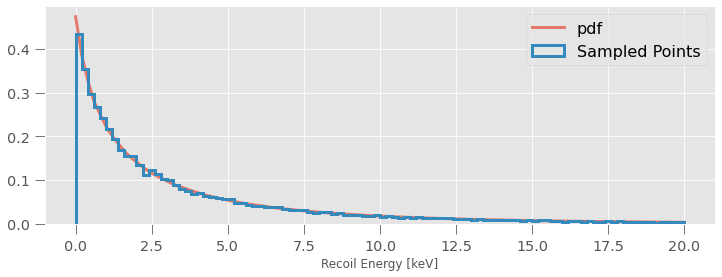

In [10]:
sampled_Er = plotter.plot_sampled_data(50000, xscale='lin');

In [5]:
N_events = 1000
sampled_Er = A.sample_data(N_events)
sampled_t = A.sample_data(N_events, dtype='time')

These parts are better done in dali/midway. <br>


In [6]:
from multimessenger.supernova.Simulate import generator_sn_instruction
import nestpy
import pandas as pd
import straxen
downloader = straxen.MongoDownloader()

*** Detector definition message ***
You are currently using the default XENON10 template detector.

2022-07-26 18:31:17,868 - utilix - WARNING - Could not load a configuration file. You can create one at /home/kara-unix/.xenon_config, or set a custom path using

export XENON_CONFIG=path/to/your/config



In [7]:
field_file="fieldmap_2D_B2d75n_C2d75n_G0d3p_A4d9p_T0d9n_PMTs1d3n_FSR0d65p_QPTFE_0d5n_0d4p.json.gz"
field_map = straxen.InterpolatingMap(
                    straxen.get_resource(downloader.download_single(field_file),
                                         fmt="json.gz"),
                    method="RegularGridInterpolator")

Caution, the times need to be passed in nanoseconds!

In [8]:
nc = nestpy.NESTcalc(nestpy.DetectorExample_XENON10())
## not sure if nestpy RNG issue was solved, so randomize NEST internal state
for i in range(np.random.randint(100)):
    nc.GetQuanta(nc.GetYields(energy=np.random.uniform(10,100)))
    
instr = generator_sn_instruction(energy_deposition=sampled_Er, timemode=sampled_t*1e9, n_tot=N_events, nc=nc, fmap=fieldmap)
df = pd.DataFrame(instr)

*** Detector definition message ***
You are currently using the default XENON10 template detector.



In [9]:
df

,event_number,type,time,x,y,z,amp,recoil,e_dep,g4id,vol_id,local_field,n_excitons,x_pri,y_pri,z_pri
0,1,2,2,3.662430,54.070564,-86.381203,10,7,0.141004,0,0,20.0,0,0.0,0.0,0.0
1,2,1,0,42.251606,-46.179348,-39.902798,562,7,8.880801,0,0,20.0,57,0.0,0.0,0.0
2,2,2,0,42.251606,-46.179348,-39.902798,114,7,8.880801,0,0,20.0,57,0.0,0.0,0.0
3,3,1,0,-37.352253,-2.161553,-142.277252,632,7,9.960194,0,0,20.0,72,0.0,0.0,0.0
4,3,2,0,-37.352253,-2.161553,-142.277252,97,7,9.960194,0,0,20.0,72,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92927,49998,1,3,-28.088354,-51.210621,-28.429333,72,7,2.236138,0,0,20.0,6,0.0,0.0,0.0
92928,49998,2,3,-28.088354,-51.210621,-28.429333,89,7,2.236138,0,0,20.0,6,0.0,0.0,0.0
92929,49999,2,4,49.970978,14.432033,-82.842209,14,7,0.197766,0,0,20.0,0,0.0,0.0,0.0
92930,50000,1,3,-42.787315,24.532757,-70.326309,1,7,0.566715,0,0,20.0,1,0.0,0.0,0.0


Simulate one run, and get back the context.

In [ ]:
runid = "testSNmc"
st = A.simulate_one(df, runid)

In [ ]:
peaks = st.get_df(runid, "peak_basics")
from matplotlib.colors import LogNorm
plt.hist2d(peak_basics["area"], peak_basics["range_50p_area"], 
           bins=(np.logspace(0,5,100),np.logspace(0,5,100)),
           norm=LogNorm());
plt.xscale("log"); plt.yscale("log")

Extra: The utilix package allows for easy job submission, however, I haven't implemented that yet.

In [ ]:
# from utilix.batchq import submit_job
# submit_job()